In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
from sktime.datasets import load_airline

## Classical decomposition to compute trend and seasonality


* Timeseries
    * Additive
    > trend + seasonality + residual

    * Multiplicative 
    > trend * seasonality * residual

* Trend can be computed using `Moving Average`

* If we've computed trend then we can remove it from the timeseries [De-trending]
    * Additive
    > seasonality + noise = y - trend
    * Multiplicative
    > seasonality * noise = y / trend

### How can we isolate the sesonality ??

* By taking average of seasonal points
    > Since air-line data is montly with an yearly seasonality

    > we can remove noise from seasonlaity by taking averages

    > average[ `jan-1950`, `jan-1951`, `jan-1952`, .....]

    > average[ `feb-1950`, `feb-1951`, `feb-1952`, .....]

    > average[ `mar-1950`, `mar-1951`, `mar-1952`, .....]

    > ............


In [10]:
y = load_airline()
# plot_series(y);

## Extract the Trend

* Moving average - window-size=12


In [11]:
trend = (y.rolling(12).mean().rolling(2).mean().shift(-6))
# plot_series(y, trend, labels=['y', 'trend']);

## Detrend the series

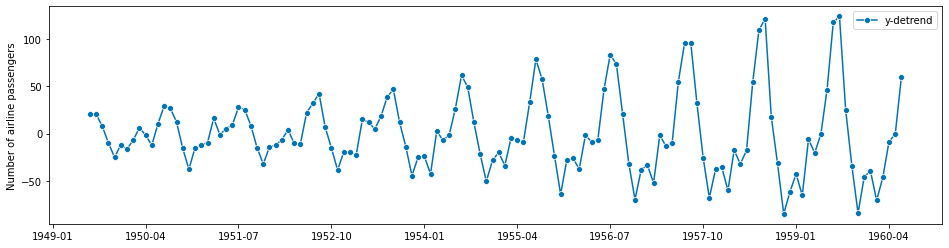

In [12]:
y_detrend = y - trend
plot_series(y_detrend, labels=['y-detrend']);

## Average de-trended data 

### Average de-trended data --> Fix the seasonal period

### Average de-trended data --> Remove the noise


In [13]:
temp = pd.DataFrame(data={'Passengers':y_detrend.values, 'Month':y.index.month}, index=y.index.to_timestamp())
temp.head()

,Passengers,Month
1949-01-01,NaN,1
1949-02-01,NaN,2
1949-03-01,NaN,3
1949-04-01,NaN,4
1949-05-01,NaN,5


In [14]:
seasonality = temp.groupby(by='Month').mean()['Passengers']

## Extract the Seasonality

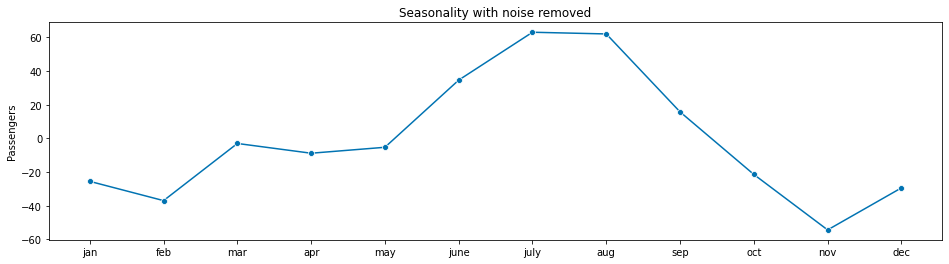

In [16]:
plot_series(seasonality);
plt.title('Seasonality with noise removed')
plt.xticks(ticks=np.arange(12), 
    labels=['jan', 'feb', 'mar', 'apr', 'may', 'june',
            'july', 'aug', 'sep', 'oct', 'nov', 'dec']);